In [1]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import skimage
from skimage.feature import canny
from skimage.segmentation import slic, mark_boundaries
from skimage.measure import approximate_polygon, subdivide_polygon
import math
import cv2

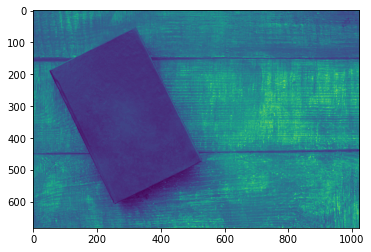

In [2]:
image = Image.open('C:/Studies/IoD/Kirill.png')
pix = image.load()
data = np.array([[int((pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) / 3) for x in range(image.size[0])] for y in range(image.size[1])])

plt.imshow(data)

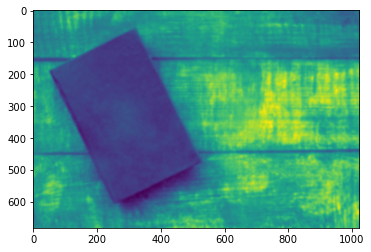

In [3]:
k = np.array([[5, 10, 5], [0, 0, 0], [0, 0, 0], [0, 0, 0], [-5, -10, -5]])
image_blured = ndimage.gaussian_filter(data, sigma=3)

plt.imshow(image_blured)

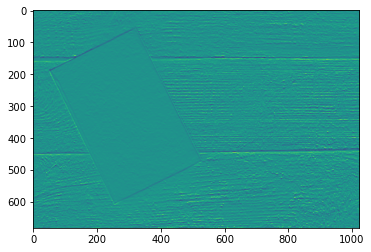

In [4]:
image_convolved = ndimage.convolve(data, k)
plt.imshow(image_convolved)

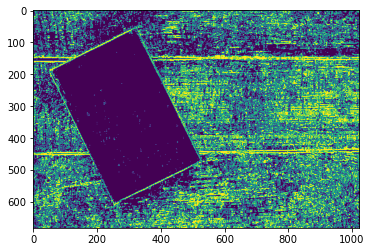

In [5]:
binary_image = np.zeros(image_convolved.shape)
for i in range(image_convolved.shape[0]):
  for j in range(image_convolved.shape[1]):
    if abs(image_convolved[i,j]) > 250:
      binary_image[i, j] = 1
plt.imshow(binary_image)

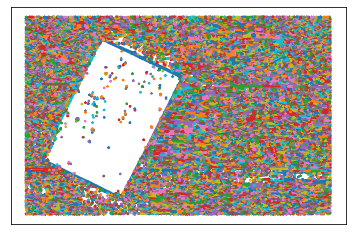

In [6]:
contours = skimage.measure.find_contours(binary_image, 0.2)
fig, ax = plt.subplots()
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.set_xticks([])
ax.set_yticks([])
plt.show()


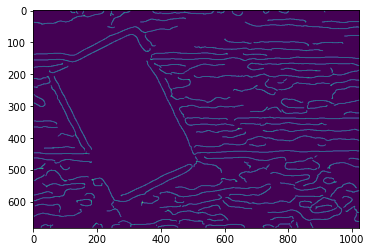

In [7]:
image_blured2 = ndimage.gaussian_filter(image_convolved, sigma=10)

edges = canny(image_blured2, 2, 1, 25)
plt.imshow(edges)

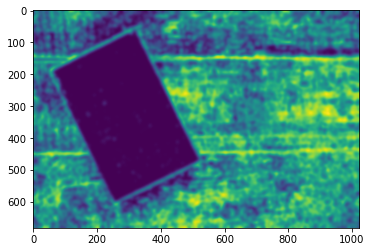

In [8]:
image_blured3 = ndimage.gaussian_filter(binary_image, sigma=5)
plt.imshow(image_blured3)

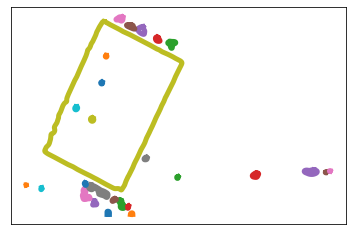

In [9]:
contours = skimage.measure.find_contours(image_blured3, 0.05)
fig, ax = plt.subplots()
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=5)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

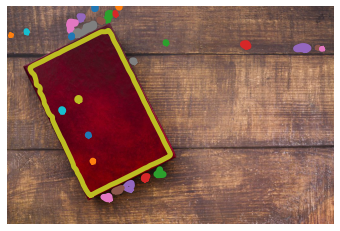

In [10]:
fig, ax = plt.subplots()
ax.imshow(image)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=5)

ax.axis("off")
plt.show()

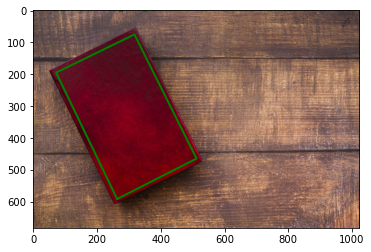

In [11]:
fig, ax = plt.subplots()
# for contour in contours:
#     new_contour = contour
#     for _ in range(5):
#         new_contour = subdivide_polygon(new_contour, degree=2, preserve_ends=True)
#         appr_contour = approximate_polygon(new_contour, tolerance=0.01)
#         ax.plot(new_contour[:, 1], new_contour[:, 0], linewidth=5)
# approximate subdivided polygon with Douglas-Peucker algorithm
ax.imshow(image)

for contour in contours:
    coords2 = approximate_polygon(contour, tolerance=100)
    if coords2.shape[0] > 3:
        coords_of_rectangle = coords2
    ax.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)

In [12]:
print(coords_of_rectangle)

[[592.         262.76234489]
 [465.         512.14037116]
 [ 75.1036171  317.        ]
 [195.          71.17694246]
 [592.         262.76234489]]


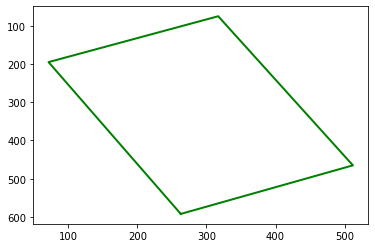

In [13]:
fig, ax = plt.subplots()
coords = coords_of_rectangle[0:4]
coords
ax.plot(coords_of_rectangle[:, 1], coords_of_rectangle[:, 0], '-g', linewidth=2)
plt.gca().invert_yaxis()

In [14]:
print(coords[0][0], coords[0][1])
print(coords[1][0], coords[1][1])
print(coords[2][0], coords[2][1])
print(coords[3][0], coords[3][1])

592.0 262.7623448926935
465.0 512.1403711610448
75.10361709561035 317.0
195.0 71.17694245643465


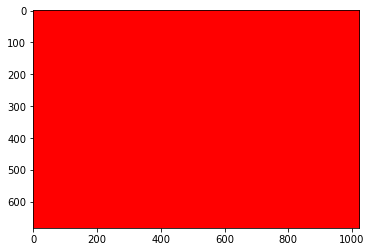

In [15]:
def isInMatrix(x1,y1,x2,y2,x,y):
    if x<=x1 or x>=x2 or y<=y1 or y>=y2: return False
    return True
def isInSide(x1,y1,x2,y2,x3,y3,x4,y4,x,y):
    if y1==y2: 
        return isInMatrix(x1,y1,x4,y4,x,y)
    l,k,s=y4-y3,x4-x3,math.sqrt((x4-x3)**2+(y4-y3)**2)
    cos,sin=l/s,k/s
    x1r,y1r=x1*cos+y1*sin,y1*cos-x1*sin
    x4r,y4r=x4*cos+y4*sin,y4*cos-x4*sin
    xr,yr=x*cos+y*sin,y*cos-x*sin
    return isInMatrix(x1r,y1r,x4r,y4r,xr,yr)

p = Image.new(color=(255, 0, 0), size=(image_blured3.shape[1], image_blured3.shape[0]), mode='RGB')
image_to_draw = ImageDraw.Draw(p)

original_image = np.asarray(image)
for x in range(image.size[1]):
  for y in range(image.size[0]):
    if isInSide(coords[3][1], coords[3][0], coords[2][1], coords[2][0], coords[1][1], coords[1][0], coords[0][1], coords[0][0], x, y):
      image_to_draw.point((y, x), (original_image[x,y,0], original_image[x,y,1], original_image[x,y,2]))

plt.imshow(p)

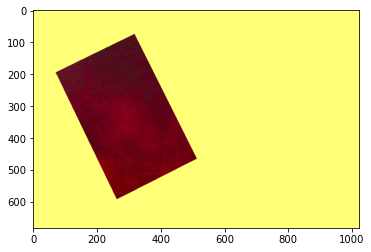

In [57]:
img = cv2.imread('C:/Studies/IoD/Kirill.jpg')
p1 = (262, 592)
p2 = (512, 465)
p3 = (317, 75)
p4 = (71, 195)
pts = np.array([p1, p2, p3, p4])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros((img.shape[0], img.shape[1]))
p = Image.new(color=(255, 255, 120), size=(img.shape[1], img.shape[0]), mode='RGB')
out2 = np.array(p)
#mask = mask * 230
cv2.fillConvexPoly(mask, pts, 1)
mask = mask.astype(np.bool)

out = np.zeros_like(img)
#out2= np.ones((img.shape[0], img.shape[1]))
out2[mask] = img[mask]


plt.imshow(out2)

TypeError: Image data of dtype object cannot be converted to float

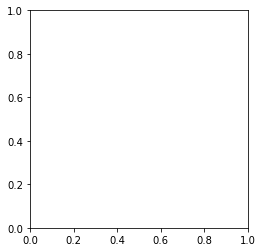

In [3]:
image_1=cv2.imread('‪C:\Studies\IoD\1.jpg')
image_2=cv2.imread('‪C:\Studies\IoD\2.jpg')

res=cv2.add(image_1, image_2)
plt.imshow(image_2)
cv2.waitKey(0)
cv2.destroyAllWindows()